# Dnn 실습

주어진 코드는 import lib, data와 Modeling 파트입니다.

타이타닉 데이터셋을 사용했습니다.

이제껏 배워왔던 내용들을 기반으로 Dnn 모델을 구축해보세요.

- 목표 : 정확도 85 넘기기

### Import library & data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset('titanic')

## EDA

목차의 KNN내용 참고

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [7]:
for i in range(len(df.columns.values)):
    print(df.columns.values[i])
    print(df[df.columns.values[i]].unique())
    print()

survived
[0 1]

pclass
[3 1 2]

sex
['male' 'female']

age
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

sibsp
[1 0 3 4 2 5 8]

parch
[0 1 2 5 3 4 6]

fare
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.687

In [8]:
df = df.drop(['deck', 'embark_town'], axis=1)  
print(df.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [9]:
df = df.dropna(subset=['age'], how='any', axis=0)  
print(len(df))

714


In [10]:
most_freq = df['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)

S


In [11]:
df['embarked'].fillna(most_freq, inplace=True)

In [12]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [13]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

In [14]:
onehot_sex = pd.get_dummies(df['sex'])

In [15]:
df = pd.concat([df, onehot_sex], axis=1)

In [16]:
onehot_embarked = pd.get_dummies(df['embarked'], prefix='town')
df = pd.concat([df, onehot_embarked], axis=1)

In [18]:
df.drop(['sex', 'embarked'], axis=1, inplace=True)

In [19]:
df.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


## Modeling

In [20]:
X=df[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]
y=df['survived']

In [24]:
X = StandardScaler().fit(X).transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=20) 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential()
model.add(Dense(256, input_shape=(9,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 16)                4112      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 72,753
Trainable params: 72,753
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
16/16 [==============================] - 0s 10ms/step - loss: 0.2161 - accuracy: 0.7025 - val_loss: 0.1500 - val_accuracy: 0.8047
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1514 - accuracy: 0.7715 - val_loss: 0.1376 - val_accuracy: 0.7953
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1226 - accuracy: 0.8321 - val_loss: 0.1344 - val_accuracy: 0.8186
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1375 - accuracy: 0.8050 - val_loss: 0.1275 - val_accuracy: 0.8140
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1283 - accuracy: 0.8205 - val_loss: 0.1292 - val_accuracy: 0.8186
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1299 - accuracy: 0.8260 - val_loss: 0.1237 - val_accuracy: 0.8279
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1216 - accuracy: 0.8269 - val_loss: 0.1299 - val_accuracy: 0.8093
Epoch 8/30
16/16 [=

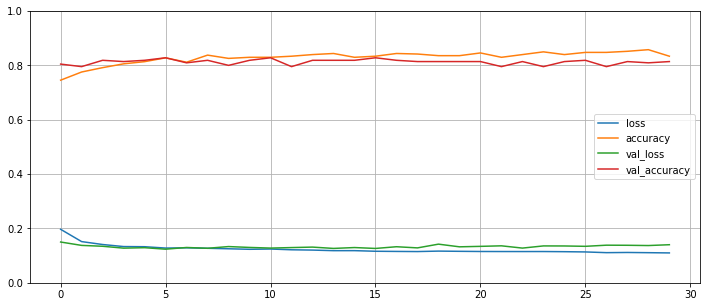

In [38]:
pd.DataFrame(history.history).plot(figsize=(12, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()